In [1]:
# importing functions
%run helper_functions.ipynb

### Prior transformation of data
#### Calculated values
* Filling missing values
* 

-------

Standardizing

Log transformatio of targets and "cAlGa", "cAlIn", "cGaAl", "cInAl", "cInGa", "distAlO", "distGaAl", "distGaIn", "distGaO", "distInAl", "distInGa", "distInO", "spacegroup"

### Setting baseline

In [2]:
from lightgbm import LGBMRegressor
params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)
print(evaluate_CV(lgbm_fe, X_full, y_fe))
print(evaluate_CV(lgbm_fe, X_full, np.log1p(y_fe), metric=rmsle_scorer_exp))
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)
print(evaluate_CV(lgbm_be, X_full, y_be))
print(evaluate_CV(lgbm_be, X_full, np.log1p(y_be), metric=rmsle_scorer_exp))

0.031066445223411267
0.030964303938499287
0.08758422696536297
0.08727756650641322


In [3]:
lgbm_be.fit(X_full, np.log1p(y_be))
lgbm_fe.fit(X_full, np.log1p(y_fe))
save_results(np.expm1(lgbm_fe.predict(X_full_test)), np.expm1(lgbm_be.predict(X_full_test)), "baseline")

baseline kaggle private score: 0.06645

### Using PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
cols =['lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang']
pca.fit(X_full[cols])
X_full["pca_lattice_vector"] = pca.transform(X_full[cols])
pca.fit(X_full_test[cols])
X_full_test["pca_lattice_vector"] = pca.transform(X_full_test[cols])

In [6]:
pca = PCA(n_components=1)
cols=['lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree']
pca.fit(X_full[cols])
X_full["pca_lattice_angle"] = pca.transform(X_full[cols])
X_full_test["pca_lattice_angle"] = pca.transform(X_full_test[cols])

In [7]:
pca = PCA(n_components=1)
cols=['distAlGa','distAlIn', 'distAlO', 'distGaAl', 'distGaIn', 'distGaO', 'distInAl','distInGa', 'distInO']
pca.fit(X_full[cols])
X_full["pca_c_el"] = pca.transform(X_full[cols])
X_full_test["pca_c_el"] = pca.transform(X_full_test[cols])

In [8]:
from lightgbm import LGBMRegressor
params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)
print(evaluate_CV(lgbm_fe, X_full, y_fe))
print(evaluate_CV(lgbm_fe, X_full, np.log1p(y_fe), metric=rmsle_scorer_exp))

0.030744992744092387
0.03084004163630935


In [9]:
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)
print(evaluate_CV(lgbm_be, X_full, y_be))
print(evaluate_CV(lgbm_be, X_full, np.log1p(y_be), metric=rmsle_scorer_exp))

0.08715000925740105
0.08677325468186294


### Dropping columns

In [10]:
lgbm_be = LGBMRegressor(**params_be)
baseline = evaluate_CV(lgbm_be, X_full, y_be) 
print("baseline:", baseline)
for col in X_full.columns:
    new_score = evaluate_CV(lgbm_be, X_full.drop(col,axis=1), y_be)
    if baseline > new_score:
        print(col, new_score)

baseline: 0.08715000925740105
percent_atom_al 0.08621065106284617
percent_atom_ga 0.086415160363865
lattice_vector_1_ang 0.0868712784667651
lattice_vector_2_ang 0.08586715437593839
lattice_vector_3_ang 0.08700375247938721
lattice_angle_alpha_degree 0.0869579113060174
lattice_angle_beta_degree 0.08695994474613063
cAlAl 0.08705987928697848
cAlGa 0.0866104975587514
cAlIn 0.08678722837191286
cAlO 0.08680073863465923
cGaAl 0.0869645283264347
cGaGa 0.08679901138522597
cGaIn 0.08711655051669535
cGaO 0.08689612905066052
cInAl 0.08648972206992461
cInGa 0.08674504211638843
cInIn 0.08713715137765658
distAlAl 0.08682884426837939
distAlIn 0.08697349966879409
distAlO 0.08688603557769445
distGaGa 0.08694167168861149
distGaIn 0.08683990153098789
distInGa 0.08685202560294314
distInIn 0.08710651750246226
distInO 0.08707136174234235
qAl 0.08714778473557874
qGa 0.08711455715587571
qIn 0.0870801054813535
pca_lattice_vector 0.08654929560908897
pca_lattice_angle 0.08704129320860352
pca_c_el 0.086815698913190

In [11]:
lgbm_be = LGBMRegressor(**params_be)
cols_to_drop = ["pca_lattice_vector", "cAlIn"]
print(evaluate_CV(lgbm_be, X_full.drop(cols_to_drop, axis=1), y_be))
print(evaluate_CV(lgbm_be, X_full.drop(cols_to_drop, axis=1), np.log1p(y_be), metric=rmsle_scorer_exp))

0.08633234653505777
0.08597707489194743


In [12]:
lgbm_fe = LGBMRegressor(**params_fe)
baseline = evaluate_CV(lgbm_fe, X_full, y_fe) 
print("baseline:", baseline)
for col in X_full.columns:
    new_score = evaluate_CV(lgbm_fe, X_full.drop(col,axis=1), y_fe)
    if baseline > new_score:
        print(col, new_score)

baseline: 0.030744992744092387
number_of_total_atoms 0.03072434295835206
percent_atom_al 0.030698050909873827
lattice_angle_beta_degree 0.030653174631601693
Vatom 0.030562221893803365
cAlGa 0.03073695975675498
cAlIn 0.03052625300882798
cGaAl 0.03069949281489056
cGaGa 0.030717432032607943
cGaIn 0.030717932812683264
cGaO 0.03074184269705485
cInAl 0.030603244347125347
cInIn 0.03071828813673763
distGaO 0.030721962661226863
qAl 0.030738007735953615
qO 0.030713420362384263
centroSym 0.03073249927157435


In [13]:
lgbm_fe = LGBMRegressor(**params_fe)
cols_to_drop = ["cAlIn", "cInAl"]
print(evaluate_CV(lgbm_fe, X_full.drop(cols_to_drop, axis=1), y_fe))
print(evaluate_CV(lgbm_fe, X_full.drop(cols_to_drop, axis=1), np.log1p(y_fe), metric=rmsle_scorer_exp))

0.03008359331808047
0.030236627563077028


In [14]:
X_full_be = X_full.drop(["cAlIn"], axis=1)
X_full_fe = X_full.drop(["cAlIn", "cInAl"], axis=1)
X_full_test_be = X_full_test.drop(["cAlIn"], axis=1)
X_full_test_fe = X_full_test.drop(["cAlIn", "cInAl"], axis=1)

In [15]:
lgbm_be.fit(X_full_be, np.log1p(y_be))
lgbm_fe.fit(X_full_fe, np.log1p(y_fe))
save_results(np.expm1(lgbm_fe.predict(X_full_test_fe)), np.expm1(lgbm_be.predict(X_full_test_be)), "removal + pca")

Kaggle private score without pca: 0.06631

Kaggle private score with pca: 0.06681

**We can conclude that PCA didn't help us achieve better results for the test dataset.**

## Reloading the dataset before continuing

In [16]:
# reset features
%run helper_functions.ipynb
useless_cols = ['cAlAl', 'cInIn', 'cGaGa', 'distAlAl', 'distInIn', 'distGaGa']
X_full.drop(useless_cols, axis=1, inplace=True)
X_full_test.drop(useless_cols, axis=1, inplace=True)
X_full_be = X_full.drop(["cAlIn"], axis=1)
X_full_fe = X_full.drop(["cAlIn", "cInAl"], axis=1)
X_full_test_be = X_full_test.drop(["cAlIn"], axis=1)
X_full_test_fe = X_full_test.drop(["cAlIn", "cInAl"], axis=1)


## Parameter tuning

Tuning some additional model for the 2-level regressor

In [17]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def param_search(model, grid, fe=True, transform_target=True):
    gs = GridSearchCV(model, grid, n_jobs=-1, scoring=(rmsle_scorer_exp if transform_target else rmsle_scorer), cv=3)
    target = (y_fe if fe else y_be)
    gs.fit(X_full_fe if fe else X_full_be , np.log1p(target) if transform_target else target)
    print(f"best score: {gs.best_score_}")
    print(f"best params: {gs.best_params_}")
    return gs.best_params_
    

In [20]:

model = Ridge()
grid = {
    "alpha":[0.0001,0.005,0.01,0.05,0.1,0.5,1,1.5,2,2.5],
    "random_state": [3]
}

ridge_params_be = param_search(model, grid, fe=False, transform_target=True)

ridge_params_fe = param_search(model, grid, fe=True, transform_target=True)


best score: -0.09422746032504561
best params: {'alpha': 0.0001, 'random_state': 3}
best score: -0.048699034134887395
best params: {'alpha': 2, 'random_state': 3}


In [21]:
model = ExtraTreesRegressor()
grid = {
    "n_estimators":[100,150,200,250],
    "max_depth":[None,10,12,15],
    "bootstrap":[True, False],
    "random_state": [3]
}

et_params_be = param_search(model, grid, fe=False, transform_target=True)
et_params_fe = param_search(model, grid, fe=True, transform_target=True)

best score: -0.08842670471149945
best params: {'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3}
best score: -0.02924787537074349
best params: {'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}


In [23]:
# without the added parameters
et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)
params_be = {"boosting_type": "gbdt","max_depth": 5,"learning_rate": 0.12,"n_estimators":100,"num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)

lgbm_be.fit(X_full_be, np.log1p(y_be))
et_fe.fit(X_full_fe, np.log1p(y_fe))

# saving the result
# save_results(np.expm1(et_fe.predict(X_full_test_fe)), np.expm1(lgbm_be.predict(X_full_test_be)), "et_fe + lgbm_be")

## Training 2-level stacking model

In [24]:
from sklearn.model_selection import train_test_split
X_train_fe, X_val_fe, y_train_fe, y_val_fe = train_test_split(X_full_fe, y_fe, train_size=0.2, random_state=1)
X_train_be, X_val_be, y_train_be, y_val_be = train_test_split(X_full_be, y_be, train_size=0.2, random_state=1)

##### Baseline results for the validation set

In [25]:
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)

params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)

lgbm_be.fit(X_train_be, np.log1p(y_train_be))
lgbm_fe.fit(X_train_fe, np.log1p(y_train_fe))
print("fe rmsle:",rmsle(y_val_fe, np.expm1(lgbm_fe.predict(X_val_fe.values))))
print("be rmsle:",rmsle(y_val_be, np.expm1(lgbm_be.predict(X_val_be.values))))

fe rmsle: 0.03395452748503327
be rmsle: 0.09719871575692053


#### Formation energy models

##### Selecting 1st level models

In [26]:
rf_fe = RandomForestRegressor(
    criterion='mse', 
    n_estimators=1000, 
    max_depth=35, 
    min_samples_split=4, 
    random_state=1)

mlp_fe = MLPRegressor(
    activation="relu", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 50))

knn_fe = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform', 
    metric='manhattan')

params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":60,
    "num_leaves": 15}

et_params_fe={'bootstrap': True, 
              'max_depth': None, 
              'n_estimators': 250, 
              'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)


lgbm_fe = LGBMRegressor(**params_fe)

In [67]:
clf_fe =  [rf_fe, mlp_fe, knn_fe, lgbm_fe, et_fe]

In [68]:
meta_fe = Ridge()

In [69]:
stack_fe = StackingCVRegressor(regressors=clf_fe,meta_regressor=meta_fe, n_jobs=-1, random_state=3, cv=3)

In [70]:
stack_fe.fit(X_train_fe.values, y_train_fe.values)
print(rmsle(y_val_fe, stack_fe.predict(X_val_fe.values)))
print(evaluate_CV(stack_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))

0.03315942494548864


KeyboardInterrupt: 

Stacking gives satisfactory results (higher than baseline) for FE, but it is not as good as ExtraTrees on the Kaggle test set

#### Bandgap energy classifiers

##### Selecting 1st level models

In [59]:
mlp_be = MLPRegressor(
    activation="tanh", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 100, 50))

svr_be = SVR(kernel="poly", gamma="scale")

params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}

lgbm_be = LGBMRegressor(**params_be)

rf_be = RandomForestRegressor(criterion='mse', n_estimators=850, max_depth=30, min_samples_split=6, random_state=1)

clf_be = [mlp_be, svr_be, lgbm_be, rf_be]

##### Selecting meta-classifier

In [60]:
meta_be = Ridge()

##### Training the model

In [61]:
stack_be = StackingCVRegressor(regressors=clf_be, meta_regressor=meta_be, random_state=3, n_jobs=-1)

In [58]:
stack_be.fit(X_train_be.values, y_train_be.values)
print(rmsle(y_val_be, stack_be.predict(X_val_be.values)))
print("Cross-validated score:", evaluate_CV(stack_be, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer))

0.09197950178468672
Cross-validated score: 0.04883912536754113


Stacking for Bandcap energy surpasses our baseline and it will be used in the final model

## Conclusion

The final model for formation energy prediction is ExtraTrees and for bandgap energy LightGBM.

In [47]:
et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)


print(evaluate_CV(et_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))
print(evaluate_CV(stack_be, X_full_be.values, y_be.values, metric=rmsle_scorer_exp))

0.029422450328958034
0.0847799315226099


In [184]:
# Submission to kaggle
et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)

stack_be.fit(X_full_be.values, np.log1p(y_be.values))
et_fe.fit(X_full_fe, np.log1p(y_fe))

# saving the result
#save_results(np.expm1(et_fe.predict(X_full_test_fe)), np.expm1(stack_be.predict(X_full_test_be)), "et_fe + stack_be log 2")

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
                    oob_score=False, random_state=3, verbose=0,
                    warm_start=False)

The private score in Kaggle from this model is **0.06376** (would be 63rd on the leaderboards).

### Feature importances

In [185]:
et_fe.feature_importances_

array([0.10005642, 0.03112189, 0.01757936, 0.01655565, 0.04384873,
       0.02616944, 0.04238734, 0.14528681, 0.01441948, 0.01159626,
       0.03645114, 0.02132347, 0.00704044, 0.0082987 , 0.00420214,
       0.00451626, 0.00660756, 0.01199179, 0.01440089, 0.00365689,
       0.09787831, 0.02076882, 0.00371043, 0.00419463, 0.00539334,
       0.09518994, 0.00372182, 0.00606433, 0.01890669, 0.0225573 ,
       0.00549629, 0.07692194, 0.01441782, 0.05391398, 0.00335372,
       0.        ])

In [197]:
pd.DataFrame({"column":X_full_fe.columns, "importance":et_fe.feature_importances_}).sort_values(by="importance")

,column,importance
35,enantioMorph,0.000000
34,centroSym,0.003354
19,distAlGa,0.003657
22,distGaAl,0.003710
26,distInGa,0.003722
23,distGaIn,0.004195
14,cGaAl,0.004202
15,cGaIn,0.004516
24,distGaO,0.005393
30,qGa,0.005496


In [194]:
et_be = ExtraTreesRegressor(**{'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3})
et_be.fit(X_full_be, np.log1p(y_be))

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=12,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                    oob_score=False, random_state=3, verbose=0,
                    warm_start=False)

In [198]:
pd.DataFrame({"column":X_full_be.columns, "importance":et_be.feature_importances_}).sort_values(by="importance")

,column,importance
36,enantioMorph,0.000000
35,centroSym,0.000355
20,distAlGa,0.001330
23,distGaAl,0.001737
25,distGaO,0.001740
28,distInO,0.001942
31,qGa,0.001949
22,distAlO,0.002072
16,cGaO,0.002305
13,cAlO,0.002496


### Drawing graphs for the poster

In [64]:
mlp_be = MLPRegressor(
    activation="tanh", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 100, 50))

svr_be = SVR(kernel="poly", gamma="scale")

lgbm_be = LGBMRegressor(**{"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20})

rf_be = RandomForestRegressor(criterion='mse', n_estimators=850, max_depth=30, min_samples_split=6, random_state=1)

et_be = ExtraTreesRegressor(**{'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3})

params_be = {"boosting_type": "gbdt","max_depth": 5,"learning_rate": 0.12,"n_estimators":100,"num_leaves": 20}

results_df_be = pd.DataFrame(columns=["Model", "CV RMSLE"])

for name, model in {"Multi-Layer Perceptron": mlp_be, "SVR": svr_be, "LightGBM": lgbm_be, "ExtraTrees":et_be, "RandomForest":rf_be, "Stacked Model": stack_be}.items():

    results_df_be = results_df_be.append({'Model': name, 'CV RMSLE': evaluate_CV(model, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer_exp)}, ignore_index = True)


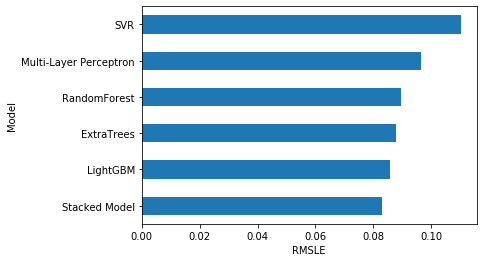

In [119]:
import pandas as pd
from matplotlib.pyplot import *

fig, ax = subplots()
results_df_be.sort_values(by="CV RMSLE").plot.barh(x='Model', y='CV RMSLE', ax=ax)
ax.set_xlabel("RMSLE")
ax.legend().remove()
plt.savefig("be_models.png", dpi=800,bbox_inches="tight")

In [92]:
rf_fe = RandomForestRegressor(
    criterion='mse', 
    n_estimators=1000, 
    max_depth=35, 
    min_samples_split=4, 
    random_state=1)

mlp_fe = MLPRegressor(
    activation="relu", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 50))

knn_fe = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform', 
    metric='manhattan')


et_fe = ExtraTreesRegressor(**{
    'bootstrap': True, 
    'max_depth': None, 
    'n_estimators': 250, 
    'random_state': 3})

lgbm_fe = LGBMRegressor(**{
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":60,
    "num_leaves": 15})

results_df_fe = pd.DataFrame(columns=["Model", "CV RMSLE"])

for name, model in {"Multi-Layer Perceptron": mlp_fe, "KNN": knn_fe, "LightGBM": lgbm_fe, "ExtraTrees":et_fe, "RandomForest":rf_fe, "Stacked Model": stack_fe}.items():

    results_df_fe = results_df_fe.append({'Model': name, 'CV RMSLE': evaluate_CV(model, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp)}, ignore_index = True)



In [93]:
results_df_fe.to_csv("models_fe.csv")

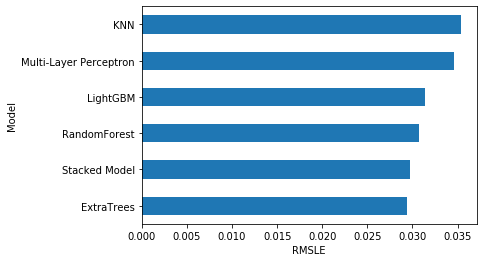

In [120]:
import pandas as pd
from matplotlib.pyplot import *

fig, ax = subplots()
results_df_fe.sort_values(by="CV RMSLE").plot.barh(x='Model', y='CV RMSLE', ax=ax)
ax.set_xlabel("RMSLE")
ax.legend().remove()
plt.savefig("fe_models.png", dpi=800,bbox_inches="tight")

In [154]:
svr_fe = SVR(kernel="poly", gamma="scale")
knn_be = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

new = pd.merge(results_df_be, results_df_fe, how="outer", on="Model")
new.rename(columns={"CV RMSLE_x":"Bandcap Energy","CV RMSLE_y":"Formation Energy"}, inplace=True)
new.set_value(1, "Formation Energy", evaluate_CV(svr_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))
new.set_value(6, "Bandcap Energy", evaluate_CV(knn_be, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer_exp))
                           

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


,Model,Bandcap Energy,Formation Energy
0,Multi-Layer Perceptron,0.096345,0.034596
1,SVR,0.110196,0.061081
2,LightGBM,0.085633,0.031374
3,ExtraTrees,0.087950,0.029422
4,RandomForest,0.089462,0.030710
5,Stacked Model,0.083119,0.029770
6,KNN,0.099874,0.035345


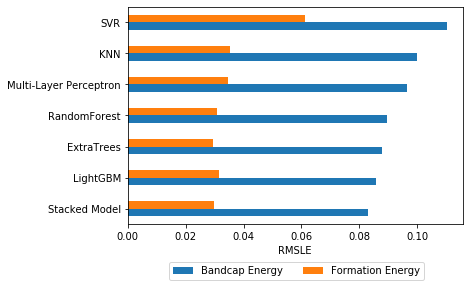

In [181]:
import pandas as pd
from matplotlib.pyplot import *

fig, ax = subplots()
new.sort_values(by="Bandcap Energy").plot.barh(x='Model', ax=ax)
ax.set_xlabel("RMSLE")
ax.set_ylabel("")
ax.legend( bbox_to_anchor=(0.9, -0.15), ncol=2)
plt.savefig("models.png", dpi=800,bbox_inches="tight")